<a href="https://colab.research.google.com/github/rzunick/MNA-Navegacion-Autonoma-Equipo-14/blob/main/4_2_Detecci%C3%B3n_de_Se%C3%B1ales_de_Tr%C3%A1nsito_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

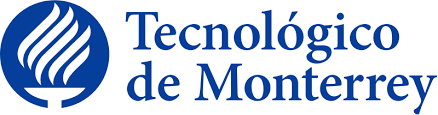

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
## Profesor: David Antonio Torres
## Actividad 4.2 - Detección de Señales de Tránsito
## **Equipo 14**: 
### - *Alejandro Juárez Corona-A01168444*
### - *Juan Carlos Lopez Cruz- A01793052*
### - *Ronald David Zúniga Sánchez-A01686240*
### - *Rodrigo López Aguilera-A01793071*

### **Redes neuronales convolucionales (CNN)**

Las convolutional neural networks o redes neuronales convolucionales (CNN), solucionan este problema ya que asumen ciertas características espaciales de los inputs que permiten simplificar las arquitecturas de la red reduciendo, en gran medida, el número de variables de entrada. Por tanto, son especialmente útiles en problemas de visión por computador, y en particular, en el reconocimiento de objetos.

**Estructura de capas de una red neuronal convolucional CNN y su funcionamiento**

Las CNN utilizan distintos tipos de capas o layers. La capa más importante, y la que da nombre a la red, es la capa convolucional.

Esta layer funciona a partir de unos filtros de tres dimensiones de pequeño tamaño, que van desplazándose por la imagen obteniendo las salidas de la capa.

Veamos un ejemplo para una imagen RGB de 32 pixeles de ancho y alto. La imagen en este caso tiene un tamaño de 32x32x3, mientras que el filtro es más pequeño, 5x5x3. Los filtros siempre tienen la misma profundidad (depth) que la imagen (en este caso, 3), ya que se desplazarán a través de la primera y segunda dimensión (paso 1 de la imagen). 

El filtro recorre todas las posiciones posibles en la imagen (paso 2 de la imagen), de izquierda a derecha y de arriba a abajo, y por cada posición obtiene una activación o un valor de salida.

La idea aquí es que el filtro va recorriendo la imagen y obteniendo features relevantes reduciendo al mismo tiempo el tamaño de la imagen resultante.

Es habitual aplicar varios filtros para obtener más features en cada posición de la imagen (paso 3 de la imagen). La idea es que cada uno de estos filtros obtenga ciertas características de la imagen que serán importantes a la hora de obtener una representación suficientemente expresiva de la misma.

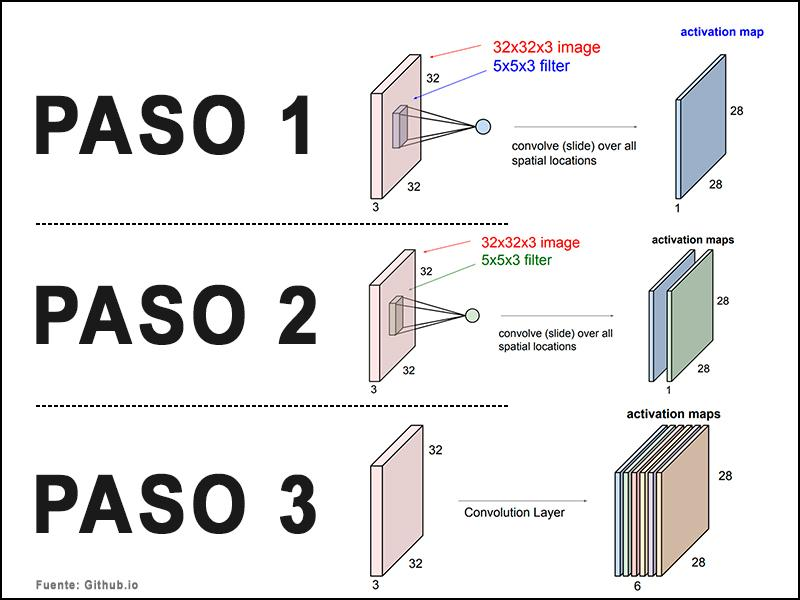

**Creando una red neuronal convolucional CNN**
Como se puede ver, las capas convolucionales aplican distintos filtros sobre una imagen de entrada y crean nuevos volúmenes, por lo que las propiedades espaciales de la imagen se mantienen.

Lo más común es aplicar capas convolucionales seguidas de funciones de activación llamadas ReLU (paso 4). La unidad ReLU se aplicaría sobre cada valor de activación salido de un filtro aplicado sobre un área. 

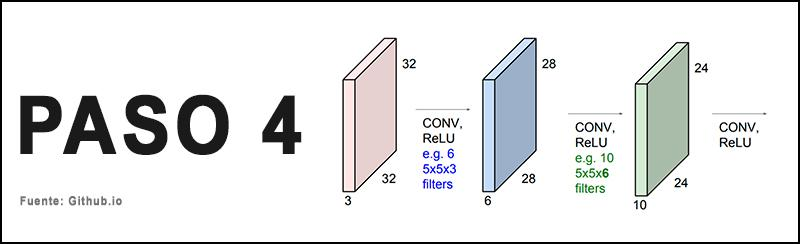

La idea aquí es que, al configurar una red de esta forma, las distintas capas van obteniendo una representación jerárquica de las features, con las primeras capas reconociendo elementos más simples en una imagen y las siguientes obteniendo representaciones de más alto nivel a partir de estos elementos simples.

Por ejemplo, las primeras capas pueden detectar bordes, para que en capas sucesivas se puedan detectar objetivos.

**Ejemplo de una red neuronal convolucional**

En la siguiente imagen, podemos ver un ejemplo de una red convolucional aplicada a un problema de clasificación de imágenes. 

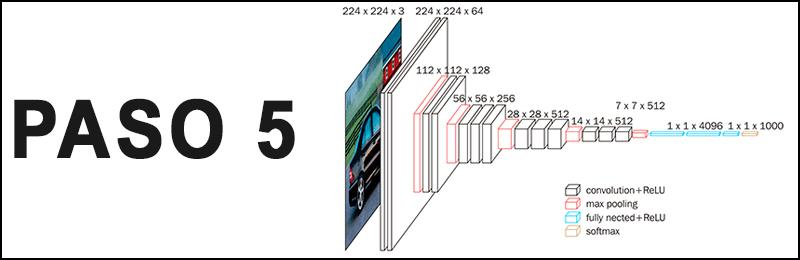

La capa de pooling (POOL) es un tipo de capa que está presente en una gran cantidad de arquitecturas CNN. Su utilidad consiste en reducir las representaciones obtenidas de manera que estas se hagan más pequeñas y sean más manejables computacionalmente, reduciendo el número de parámetros necesarios.

La última capa de una red convolucional para problemas de clasificación es una fully connected layer, ya que necesitamos una neurona de salida para cada clase que nos diga, por ejemplo, si hay o no un coche en una imagen cualquier.

Normalmente, esto se hace mediante una capa softmax. Muchas CNN llevan varias fully connected layers como últimas capas para obtener las representaciones finales después de las capas de convolutions + pooling.

### **Librerías a Utilizar**

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
print(tf. __version__) 
from matplotlib import style
style.use('fivethirtyeight')

2.10.0


### Conexión con Google drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importación de Datos previamente descargado:

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
data_dir = 'Data'
train_path = 'Data/Train'
test_path = 'Data/Test'

### Revisión de cantidad de clase que tiene el set de entrenamiento

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

### Creación de un diccionario de clases.

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Revisión de cantidad  de datos por clase.

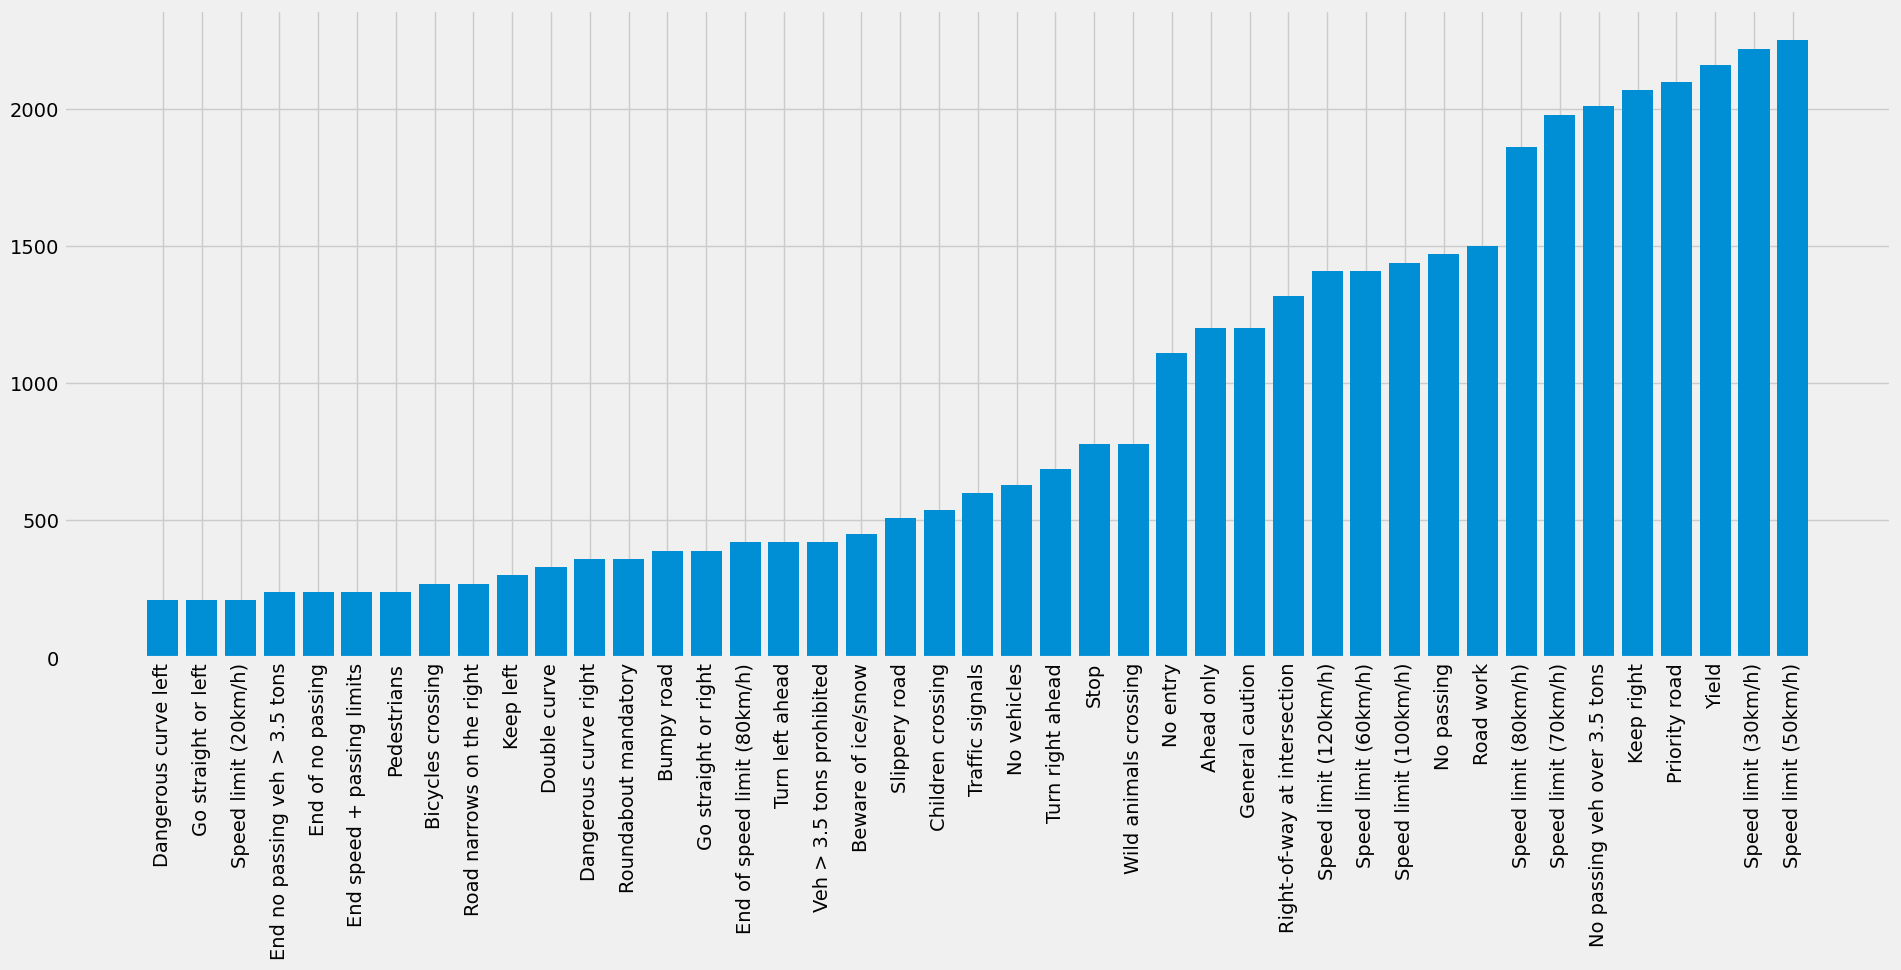

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,8))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

Visualización de datos entrenamiento.

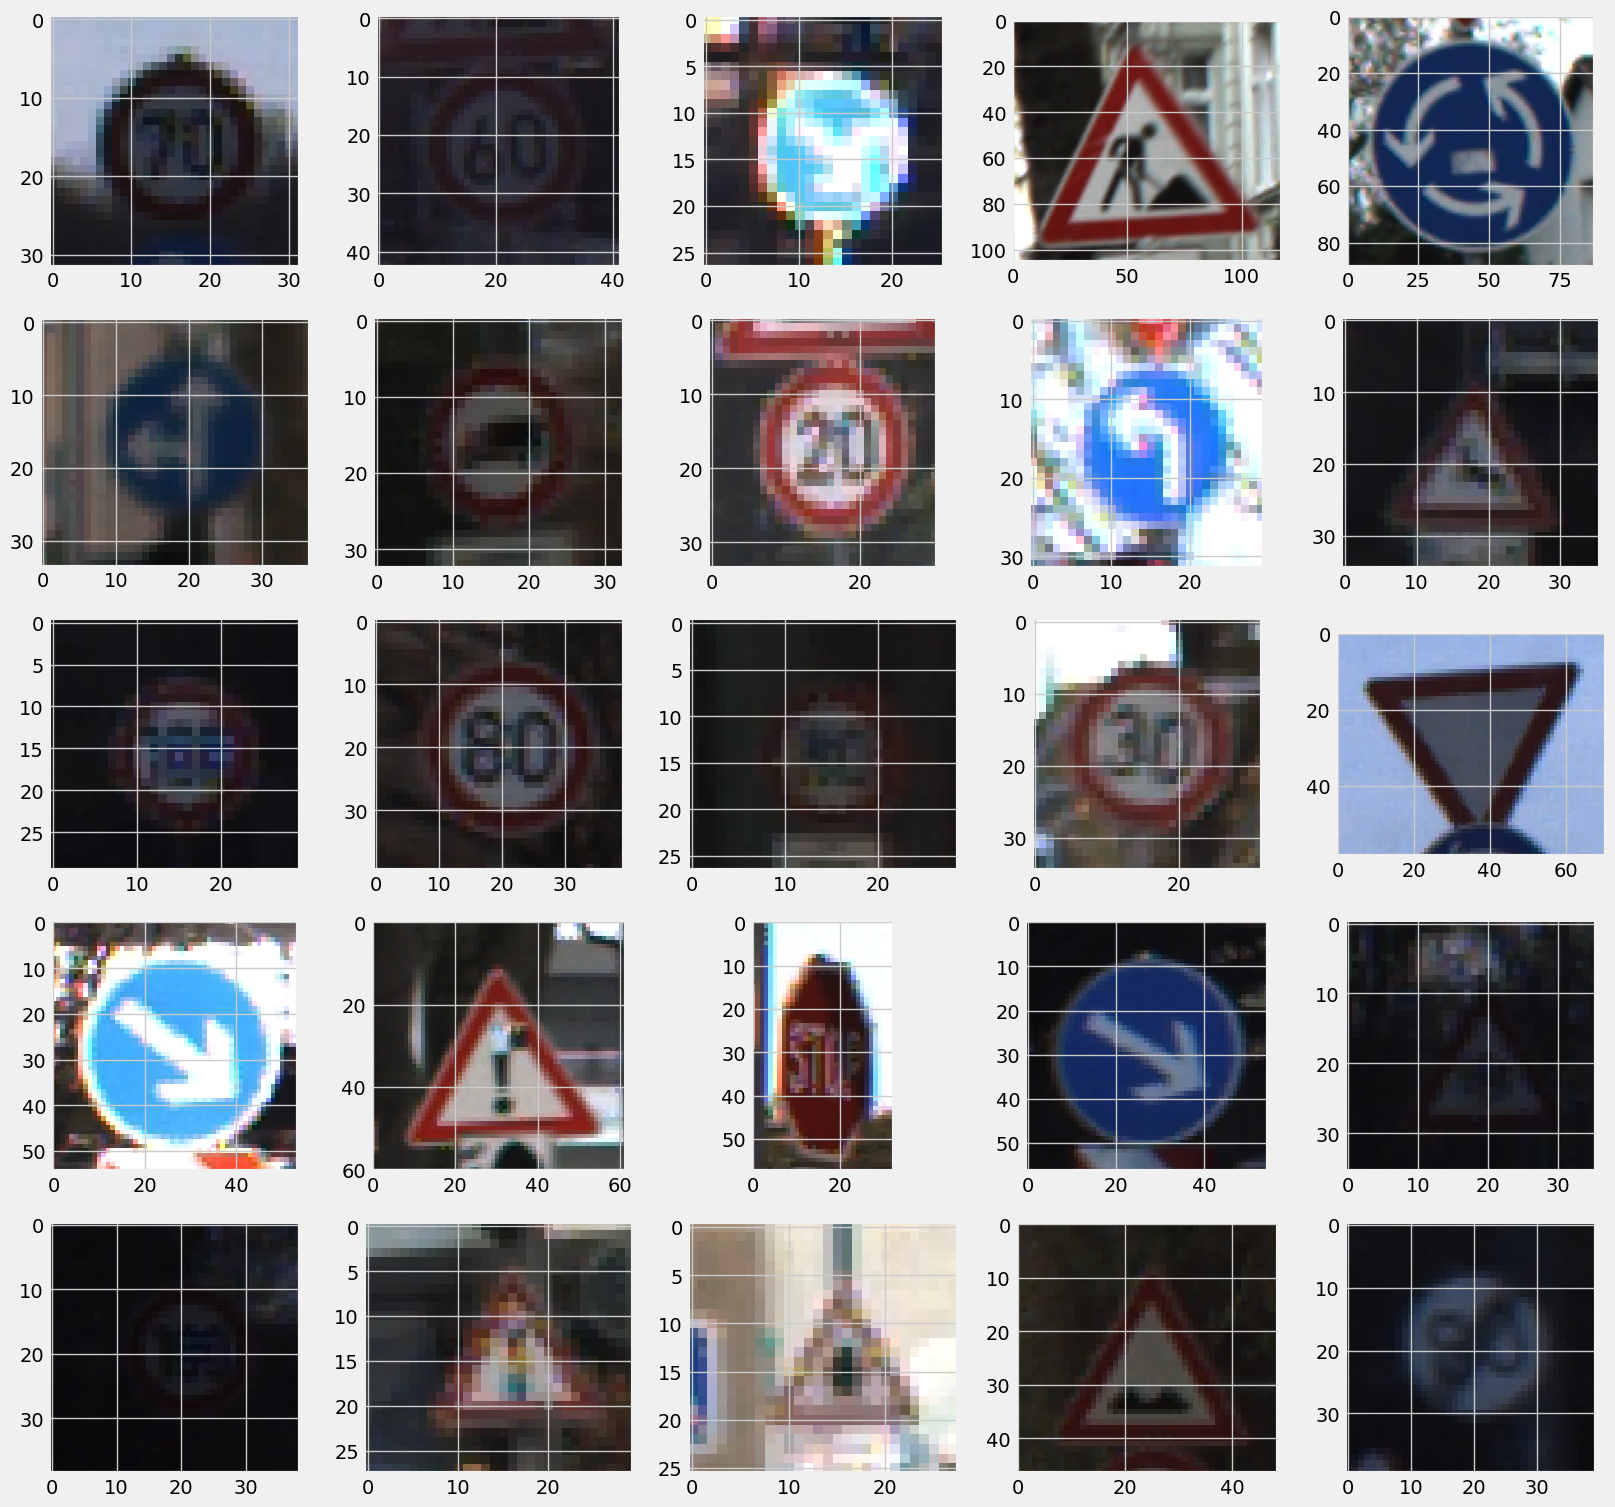

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(18,18))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    # plt.xlabel(rand_img.shape[1], fontsize = 15)#width of image
    # plt.ylabel(rand_img.shape[0], fontsize = 15)#height of image

### Union de datos de entrenamiento con Etiquetas y redimensionamiento de imagenes.

In [ ]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


### Se revuelven los datos para evitar que los vea continuos

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

### Partición de datos de entrenamiento y validación.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


### Conversión de etiquetas numéricas a valores categóricos para la salida Y


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


### Creación  del modelo de red neuronal convolucional CNN 

Modelo usado sin Aumentación  de datos.

In [ ]:
CNN = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

Modelo usado con Aumentación de datos

In [ ]:
CNN_aumentacion = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 128)        

In [ ]:
CNN_aumentacion.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 9, 9, 128)        

### Definición de hyperparametros para aprendizaje de la red.

In [ ]:
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr)
CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
CNN_aumentacion.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Aumentación de datos.

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

### Entrenamiento del modelo 

#### Entrenamiento sin Aumentación de datos.

In [ ]:
history_CNN = CNN.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 7s 8ms/step - loss: 0.4244 - accuracy: 0.8897 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 2/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0459 - accuracy: 0.9863 - val_loss: 0.0262 - val_accuracy: 0.9929
Epoch 3/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0626 - val_accuracy: 0.9825
Epoch 4/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0631 - val_accuracy: 0.9803
Epoch 5/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0328 - val_accuracy: 0.9916
Epoch 6/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0155 - val_accuracy: 0.9958
Epoch 7/30
858/858 [==============================] - 6s 7ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0164 - val_accuracy: 0.9952
Epoch 

#### Entrenamiento con Aumentación de datos.

In [ ]:
history_CNN_aumentacion = CNN_aumentacion.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 10s 11ms/step - loss: 1.5527 - accuracy: 0.5802 - val_loss: 0.1778 - val_accuracy: 0.9473
Epoch 2/30
858/858 [==============================] - 10s 11ms/step - loss: 0.2884 - accuracy: 0.9093 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 3/30
858/858 [==============================] - 10s 12ms/step - loss: 0.1575 - accuracy: 0.9506 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 4/30
858/858 [==============================] - 9s 11ms/step - loss: 0.1148 - accuracy: 0.9643 - val_loss: 0.0280 - val_accuracy: 0.9925
Epoch 5/30
858/858 [==============================] - 9s 11ms/step - loss: 0.0958 - accuracy: 0.9710 - val_loss: 0.0182 - val_accuracy: 0.9952
Epoch 6/30
858/858 [==============================] - 9s 11ms/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.0147 - val_accuracy: 0.9953
Epoch 7/30
858/858 [==============================] - 9s 10ms/step - loss: 0.0746 - accuracy: 0.9767 - val_loss: 0.0191 - val_accuracy: 0.9

#### Resultados sin Aumentación de datos.

##### Funciones de Pérdida (Loss)

Text(0.5, 0, 'epoch')

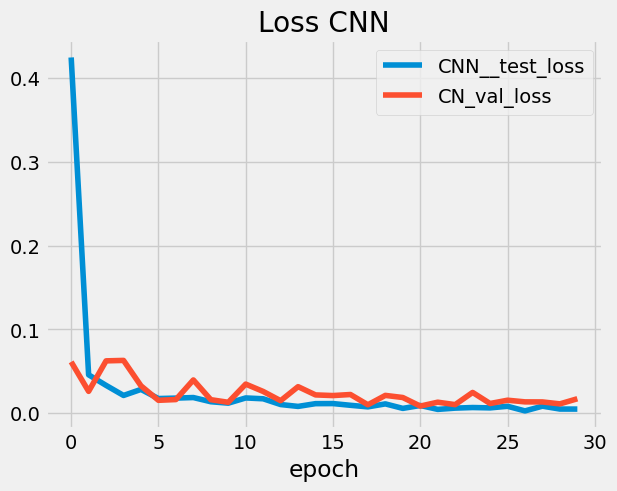

In [ ]:
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.legend(['CNN__test_loss', 'CN_val_loss'])
plt.title('Loss CNN')
plt.xlabel('epoch')

##### Precisión

Text(0.5, 0, 'epoch')

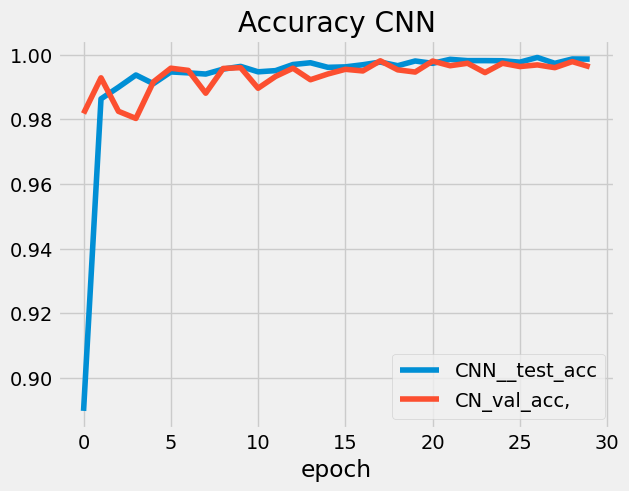

In [ ]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
# plt.plot(history_CNN_aumentacion.history['accuracy'])
# plt.plot(history_CNN_aumentacion.history['val_accuracy'])
plt.legend(['CNN__test_acc', 'CN_val_acc,'])
plt.title('Accuracy CNN')
plt.xlabel('epoch')

#### Resultados con Aumentación de datos.

##### Funciones de Pérdida (Loss)

Text(0.5, 0, 'epoch')

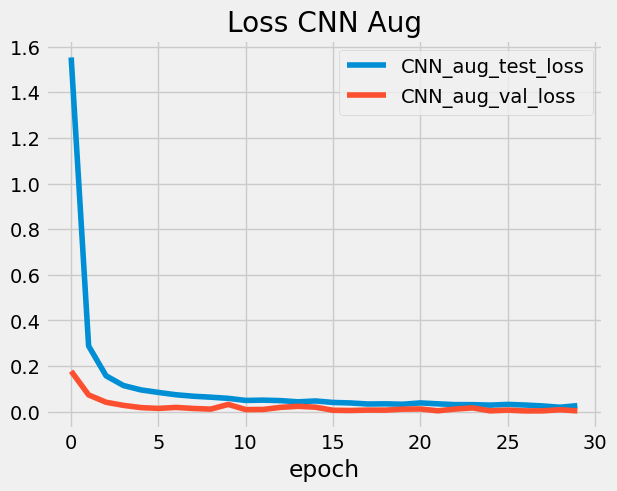

In [ ]:
plt.plot(history_CNN_aumentacion.history['loss'])
plt.plot(history_CNN_aumentacion.history['val_loss'])
plt.legend(['CNN_aug_test_loss', 'CNN_aug_val_loss'])
plt.title('Loss CNN Aug')
plt.xlabel('epoch')

##### Precisión

Text(0.5, 0, 'epoch')

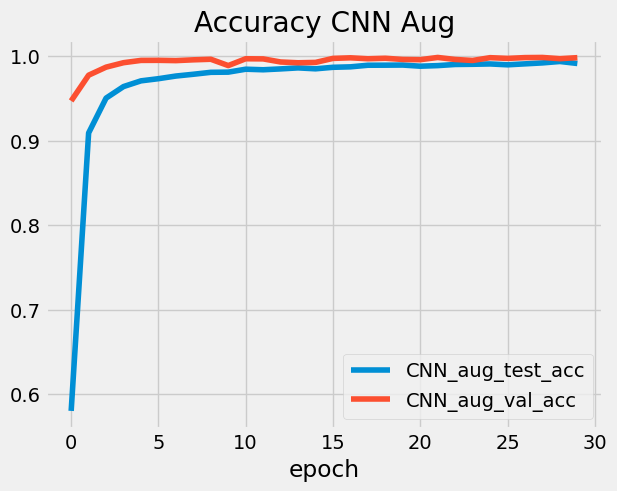

In [ ]:
plt.plot(history_CNN_aumentacion.history['accuracy'])
plt.plot(history_CNN_aumentacion.history['val_accuracy'])
plt.legend(['CNN_aug_test_acc', 'CNN_aug_val_acc'])
plt.title('Accuracy CNN Aug')
plt.xlabel('epoch')

### Evaluación de datos de prueba que el entrenamiento nunca vio.

In [ ]:
#Loading the test data and running the predictions
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred_CNN = np.argmax(CNN.predict(X_test),axis=1)
pred_CNN_aug = np.argmax(CNN_aumentacion.predict(X_test),axis=1)



395/395 [==============================] - 1s 2ms/step


#### Evaluación de entrenamiento sin Aumentación de datos

In [ ]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred_CNN)*100)

Test Data accuracy:  96.82501979414093


<Axes: >

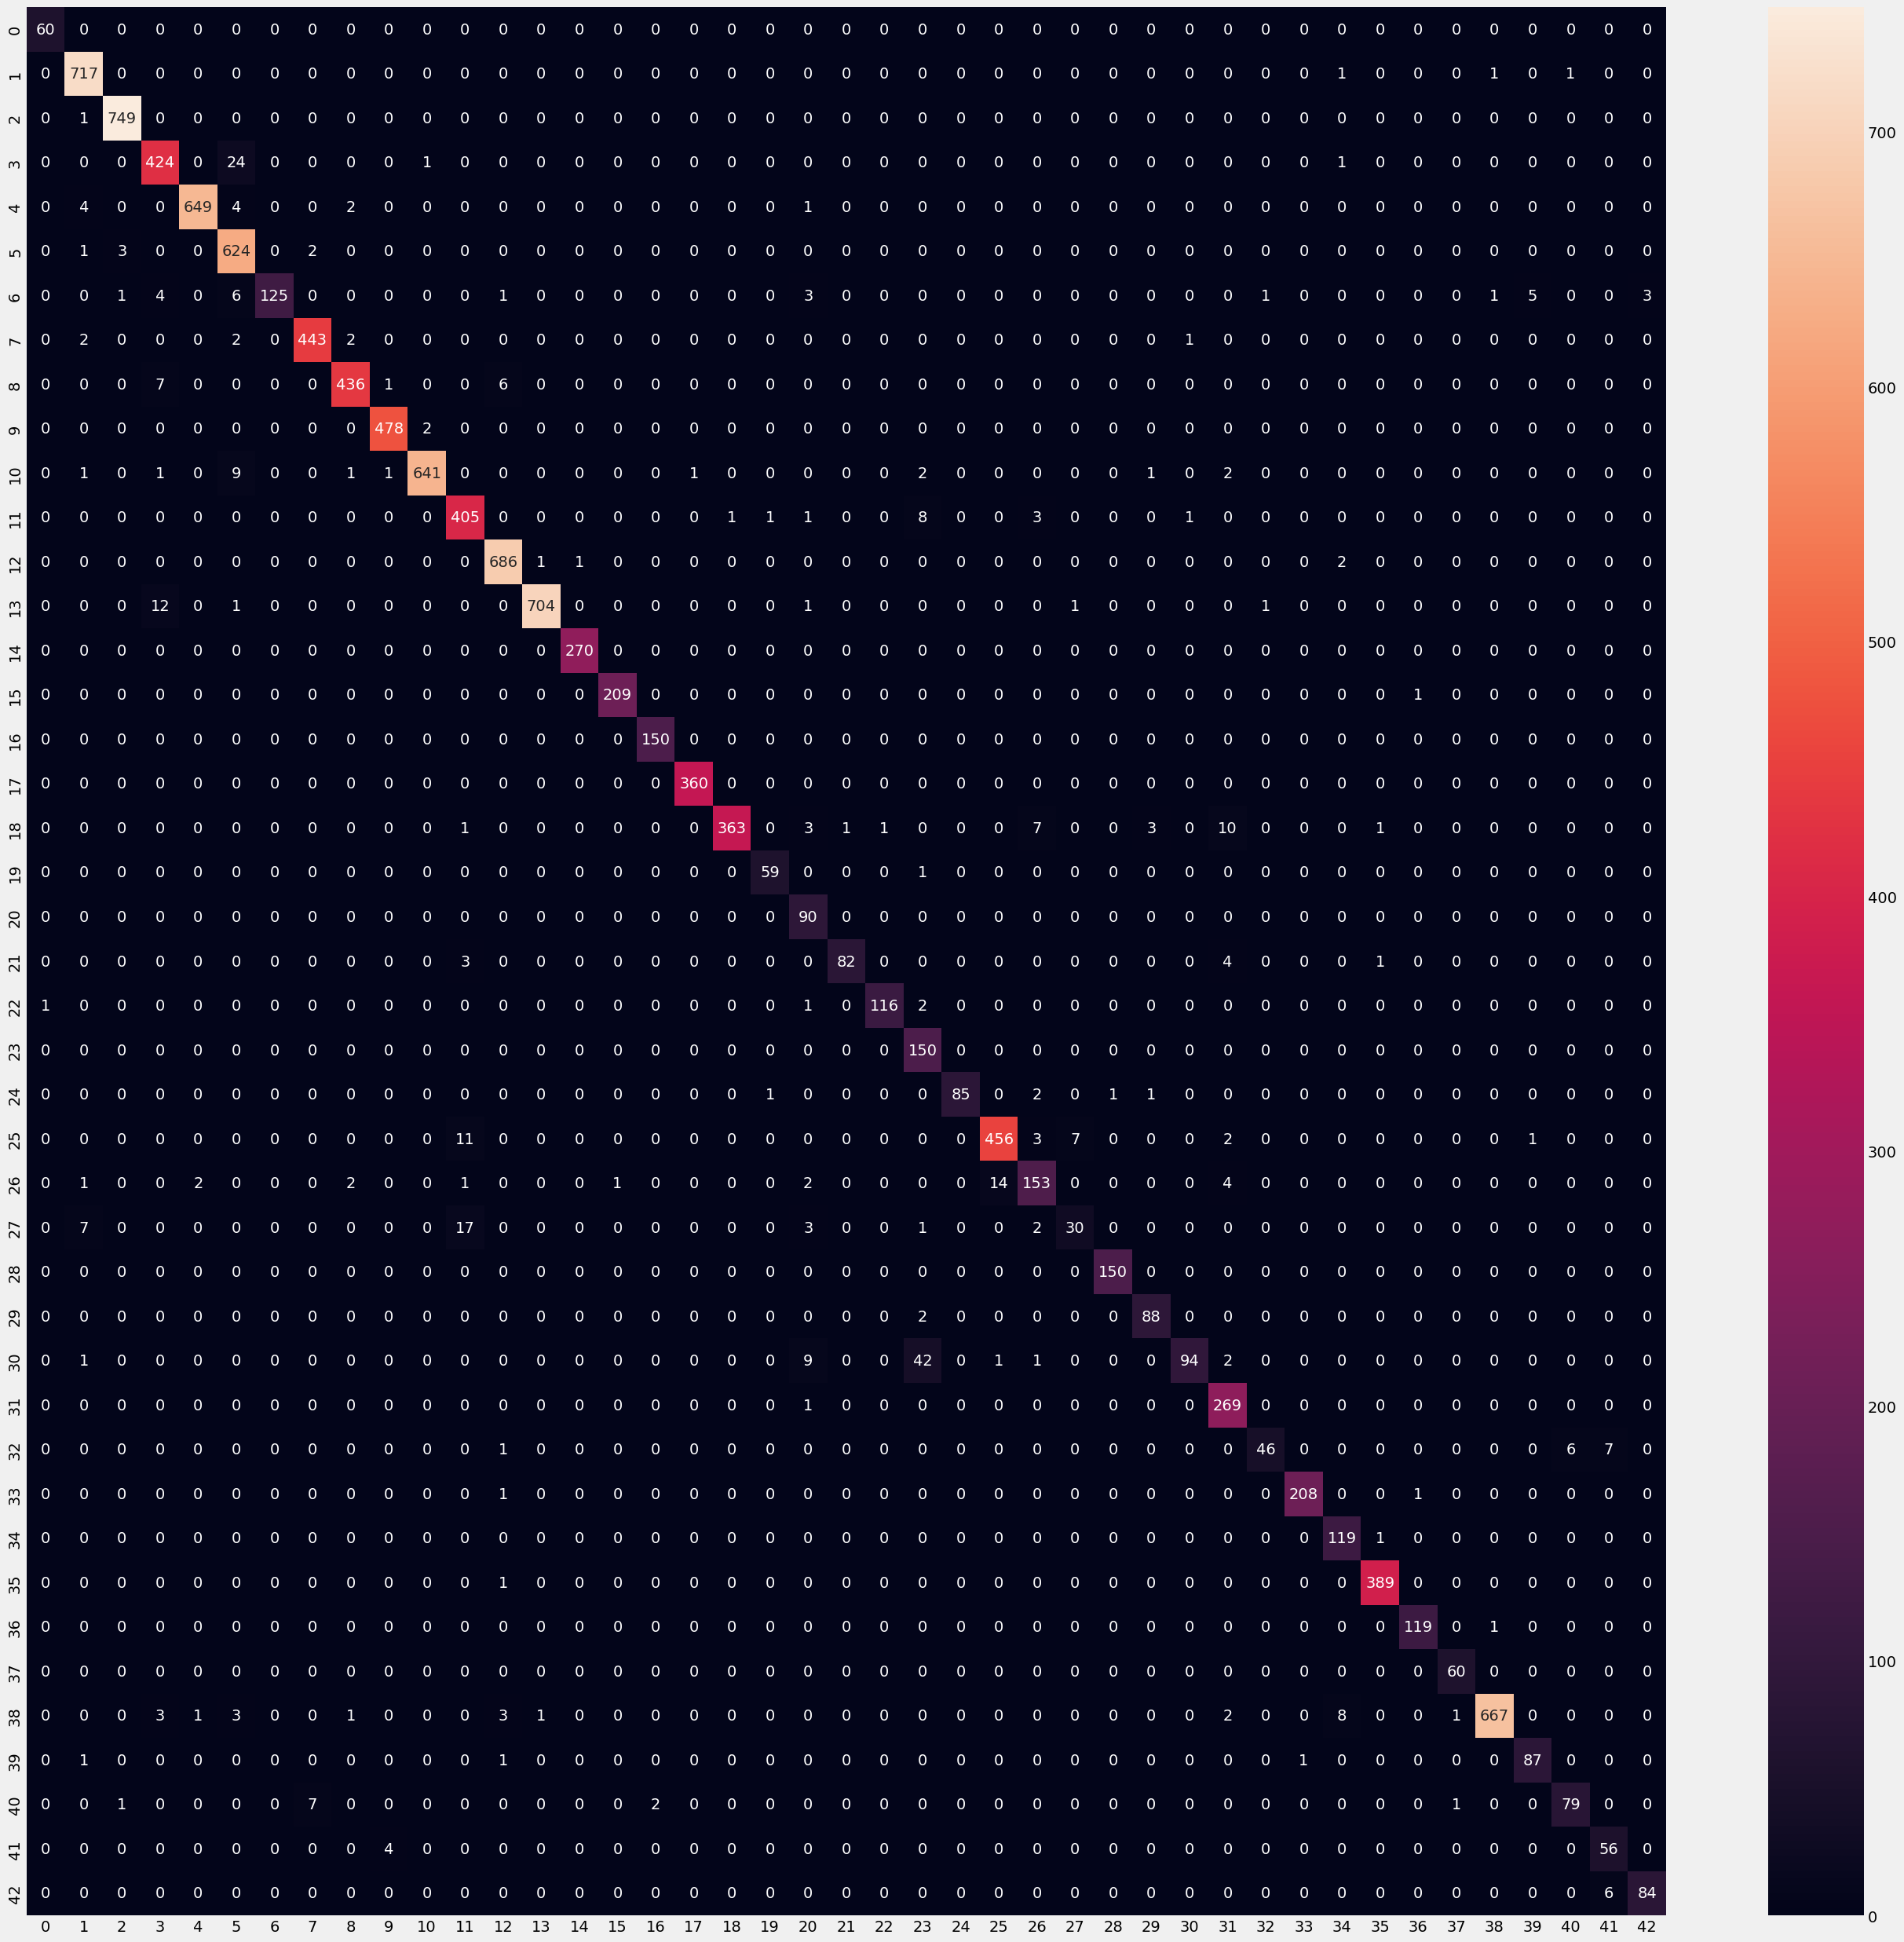

In [ ]:
#Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf_CNN = confusion_matrix(labels, pred_CNN)
import seaborn as sns
df_cm_CNN = pd.DataFrame(cf_CNN, index = classes,  columns = classes)
plt.figure(figsize = (30,30))
sns.heatmap(df_cm_CNN, annot=True,fmt='')

In [ ]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(labels, pred_CNN))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.97      1.00      0.98       720
           2       0.99      1.00      1.00       750
           3       0.94      0.94      0.94       450
           4       1.00      0.98      0.99       660
           5       0.93      0.99      0.96       630
           6       1.00      0.83      0.91       150
           7       0.98      0.98      0.98       450
           8       0.98      0.97      0.98       450
           9       0.99      1.00      0.99       480
          10       1.00      0.97      0.98       660
          11       0.92      0.96      0.94       420
          12       0.98      0.99      0.99       690
          13       1.00      0.98      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

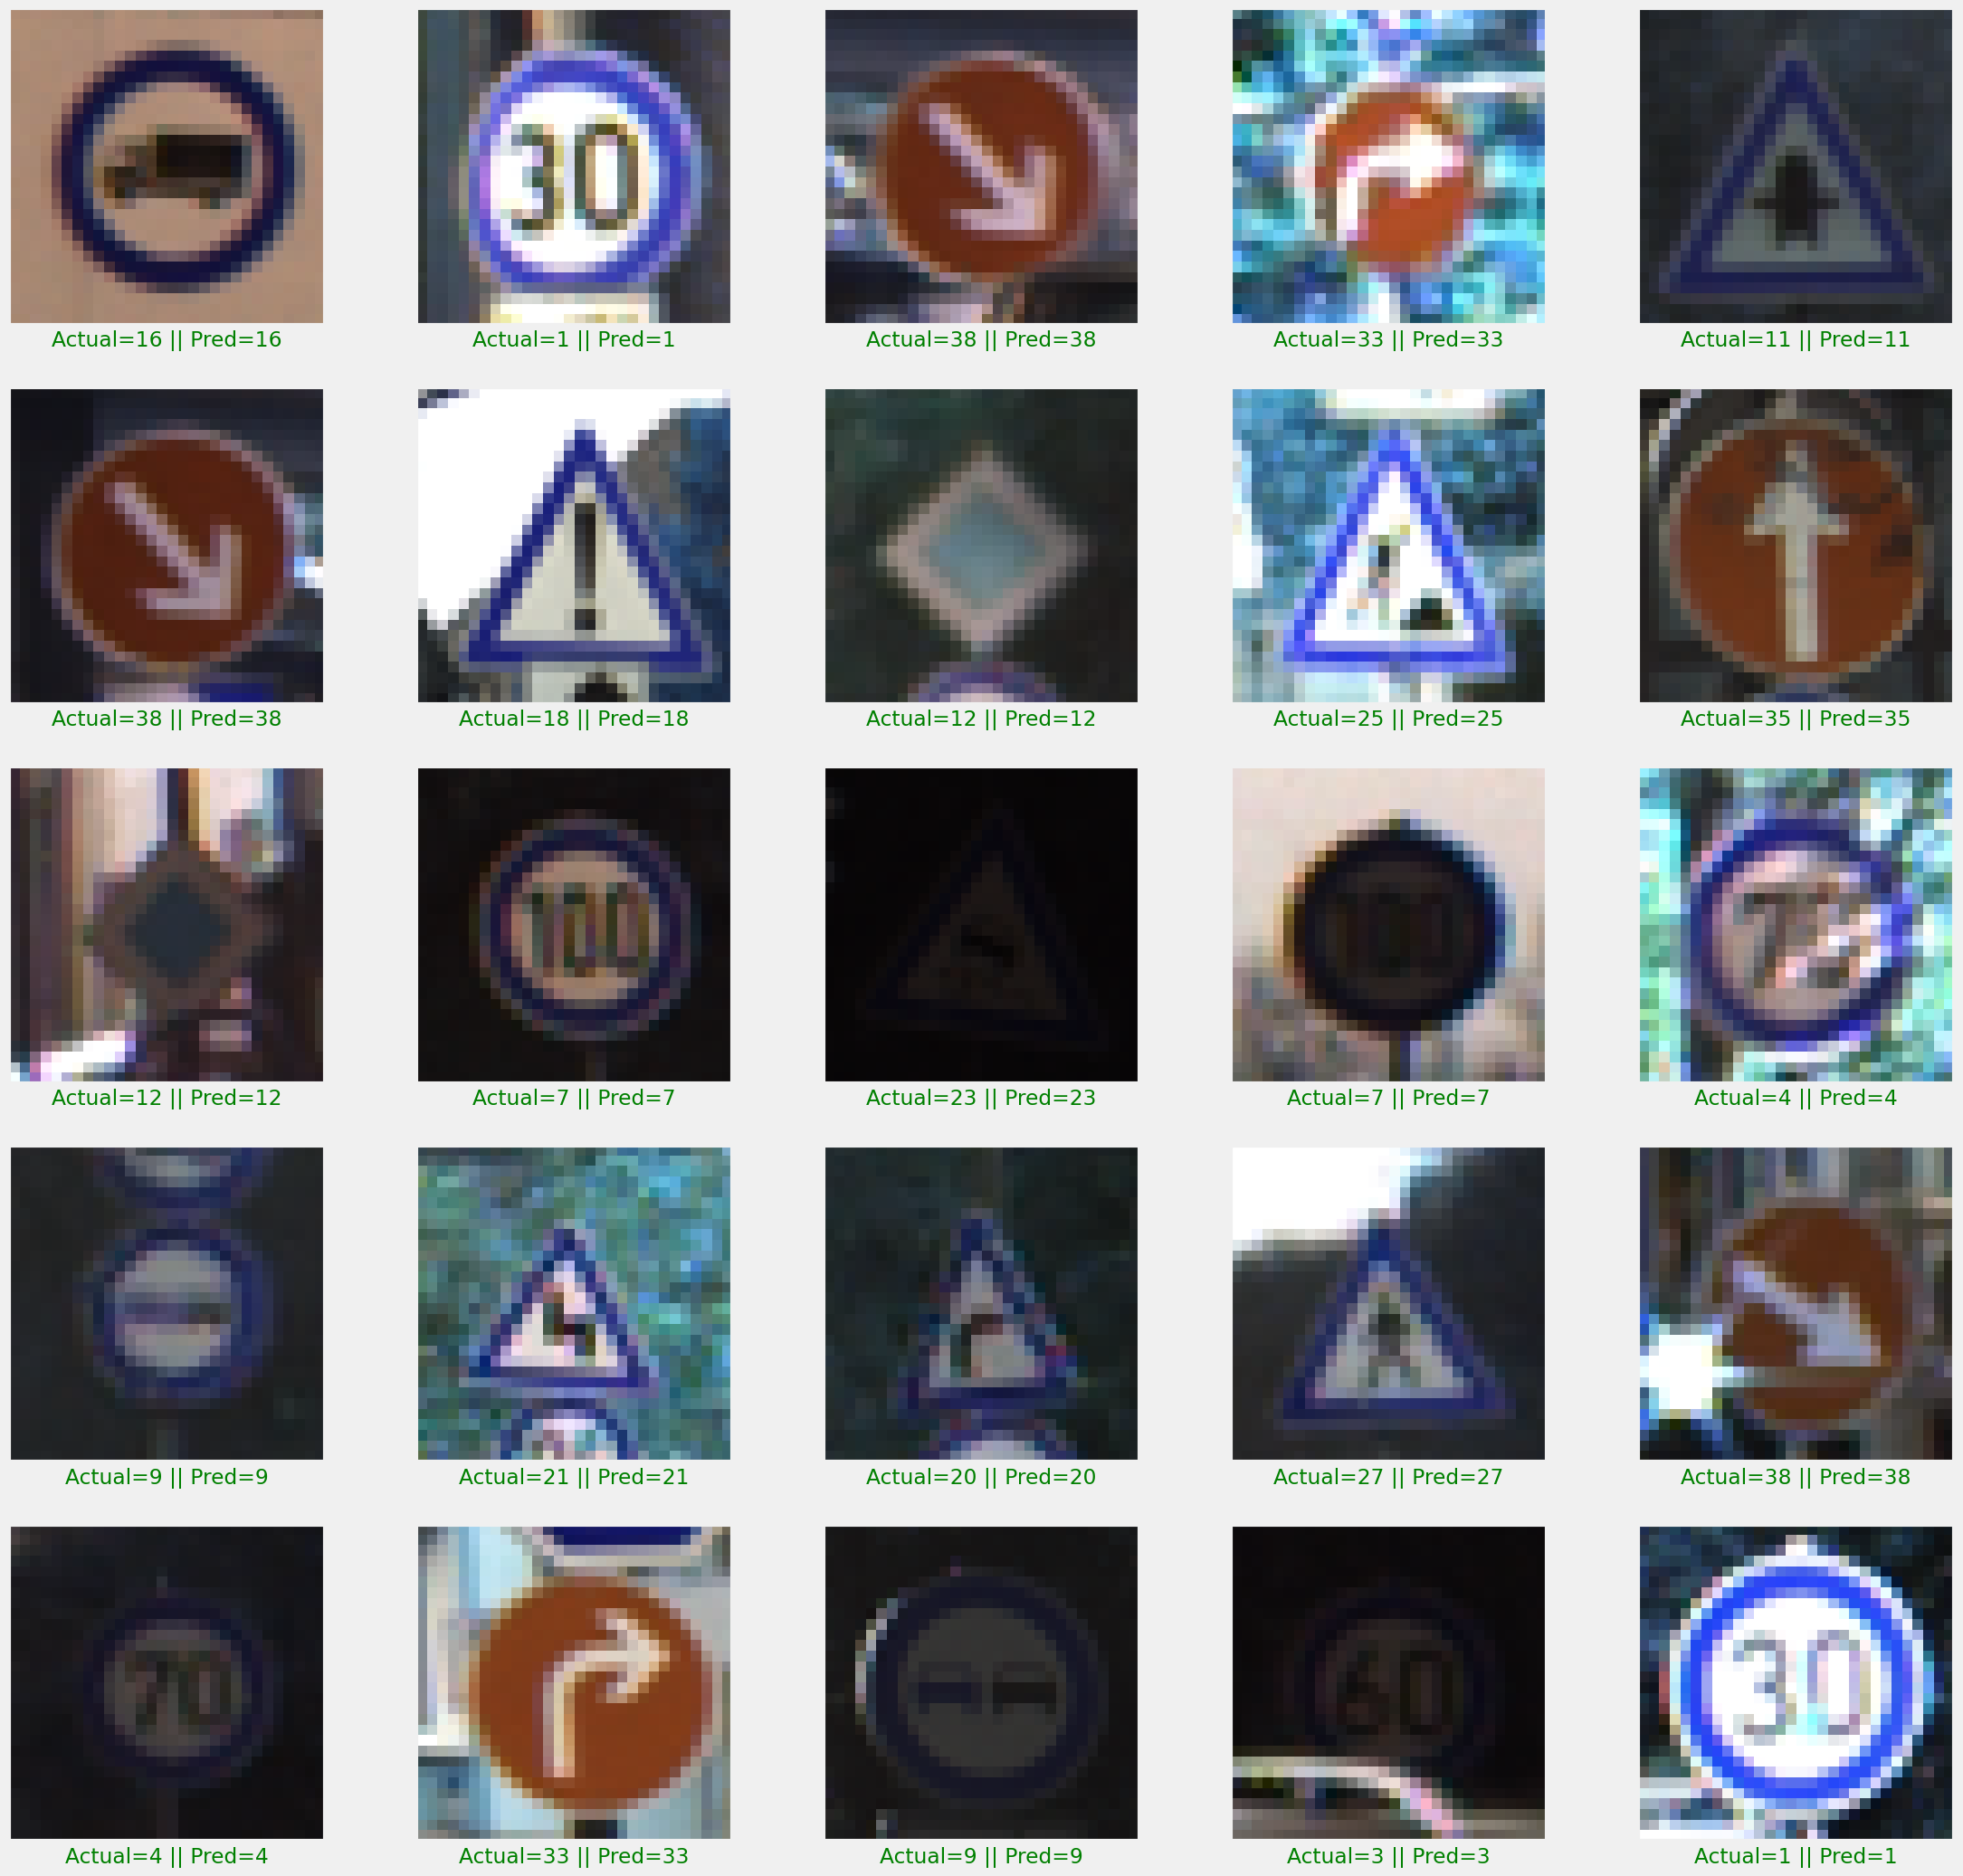

In [ ]:
#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_CNN[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

#### Evaluación de entrenamiento con Aumentación de datos

In [ ]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred_CNN_aug)*100)

Test Data accuracy:  98.07600950118764


<Axes: >

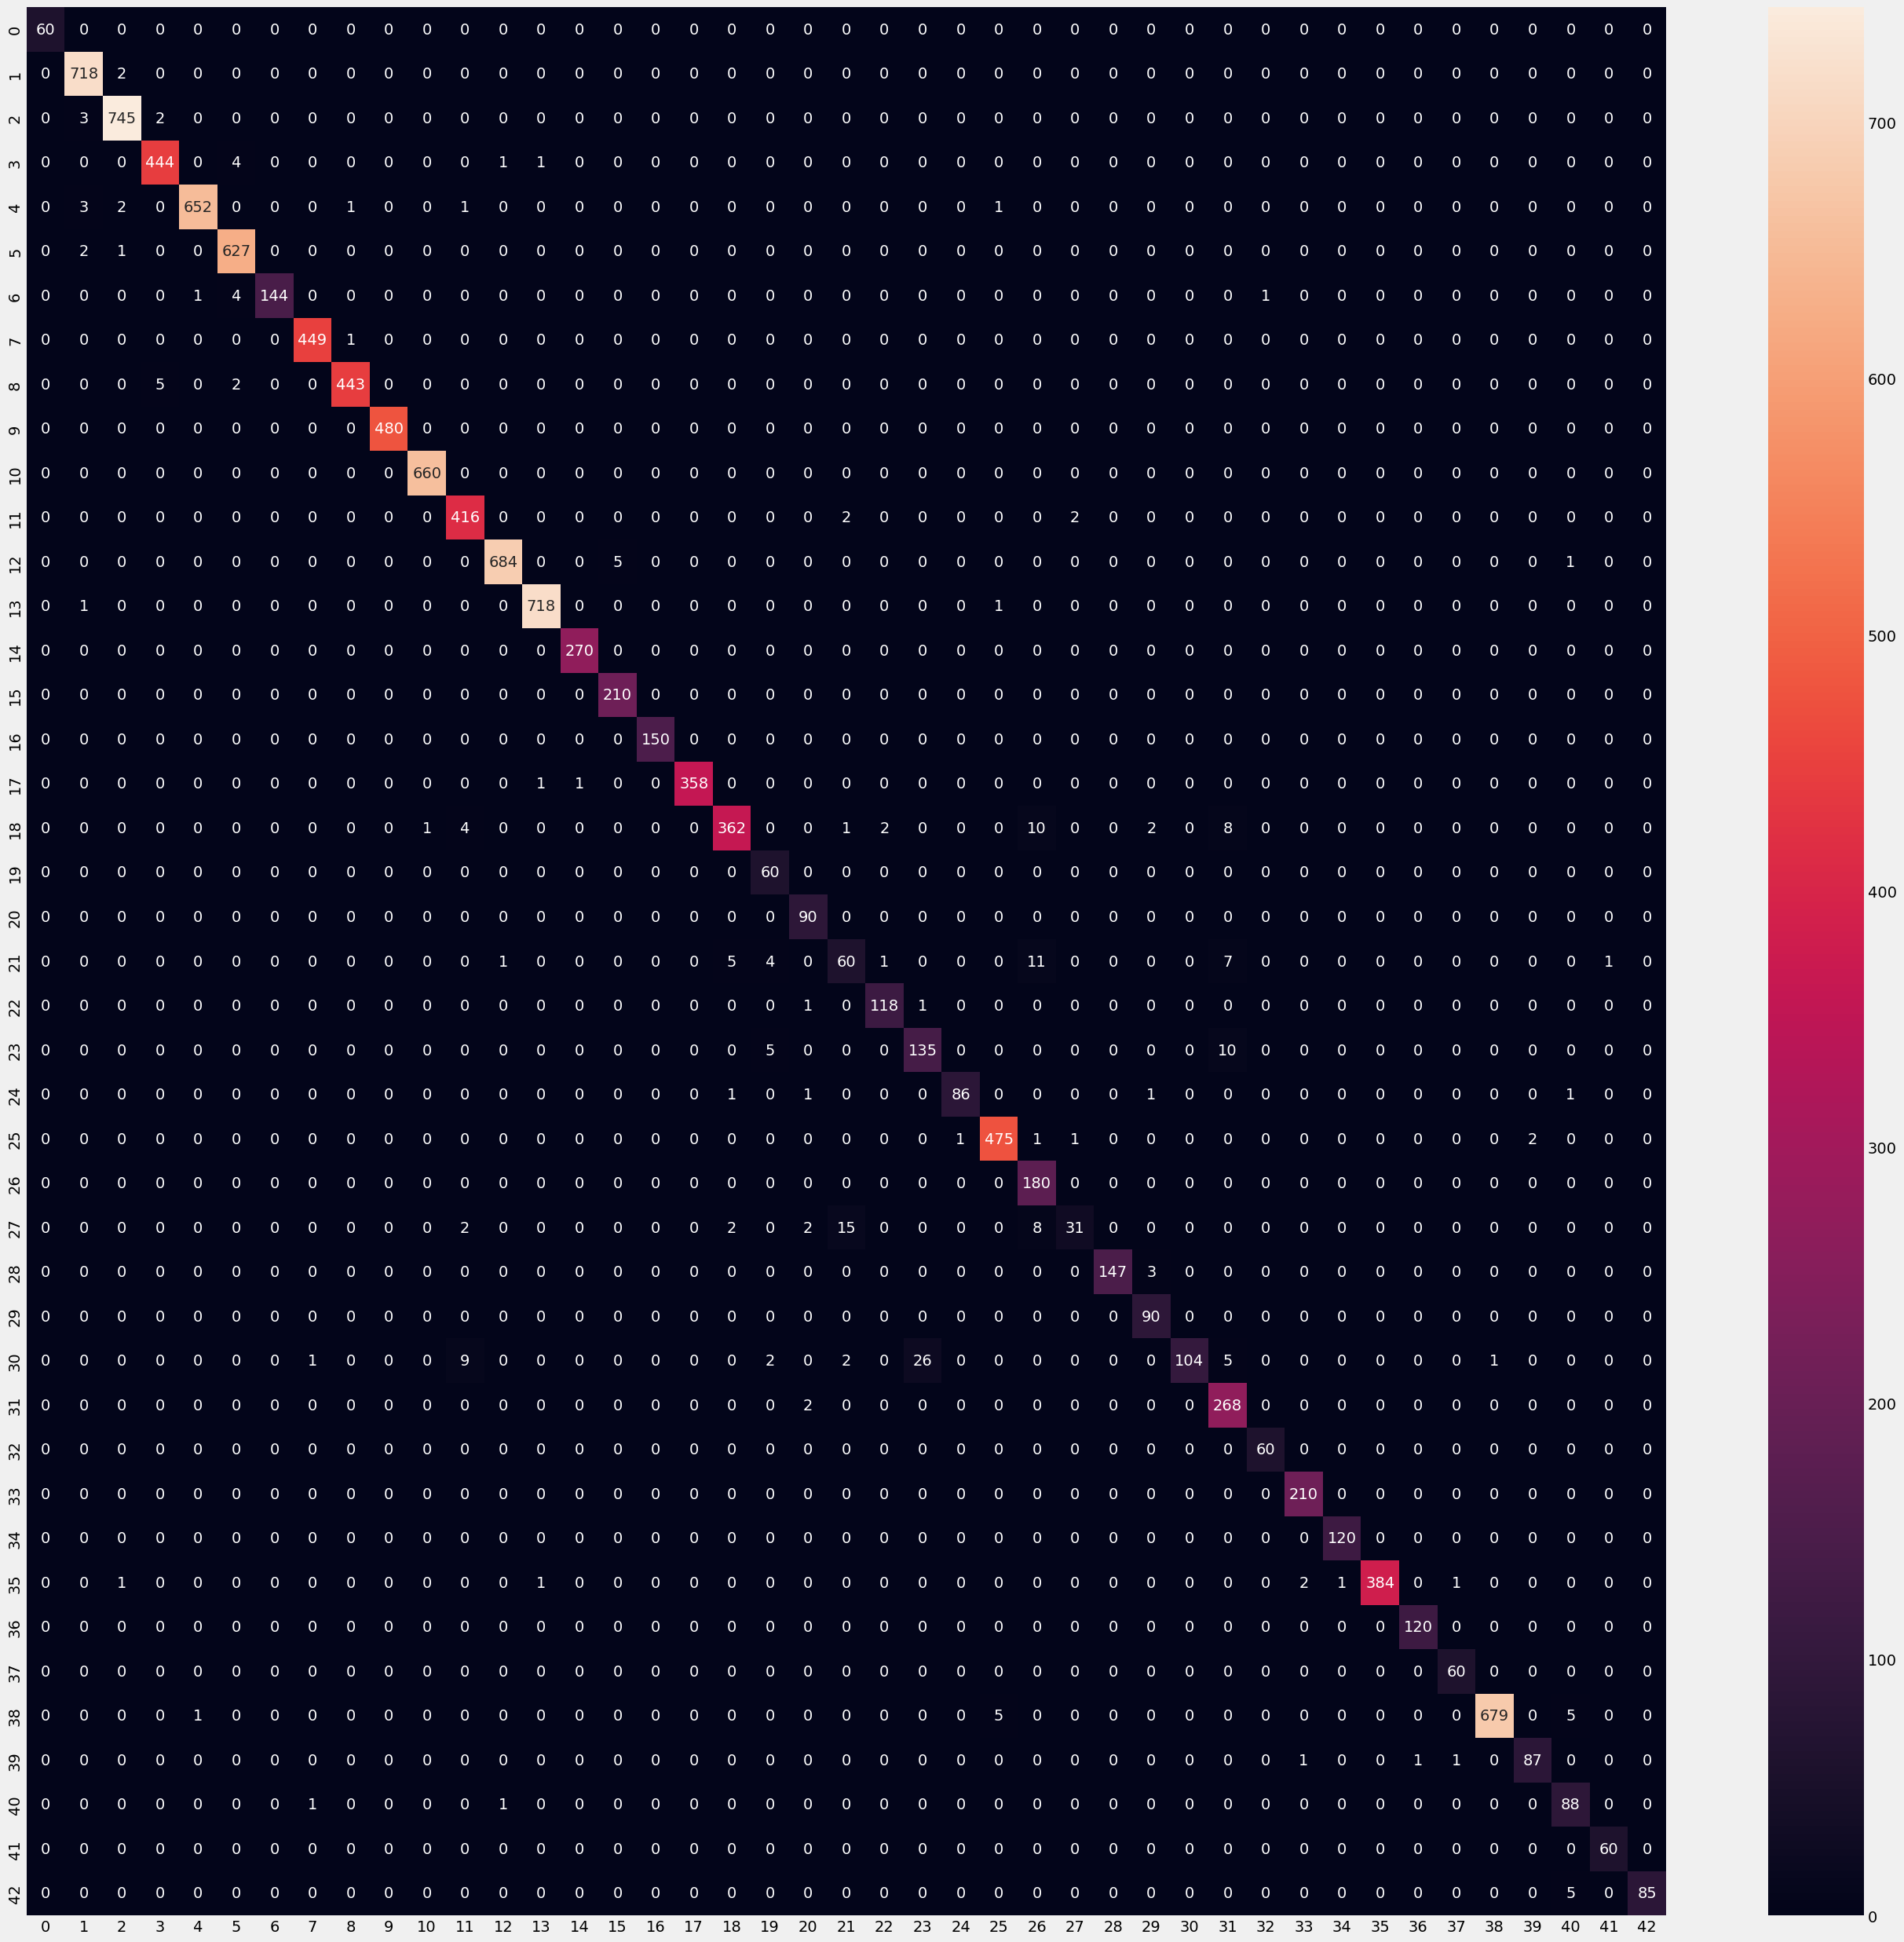

In [ ]:
#Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf_CNN = confusion_matrix(labels, pred_CNN_aug)
import seaborn as sns
df_cm_CNN = pd.DataFrame(cf_CNN, index = classes,  columns = classes)
plt.figure(figsize = (30,30))
sns.heatmap(df_cm_CNN, annot=True,fmt='')

In [ ]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(labels, pred_CNN_aug))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.98      0.99      0.99       450
           4       1.00      0.99      0.99       660
           5       0.98      1.00      0.99       630
           6       1.00      0.96      0.98       150
           7       1.00      1.00      1.00       450
           8       1.00      0.98      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.96      0.99      0.98       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

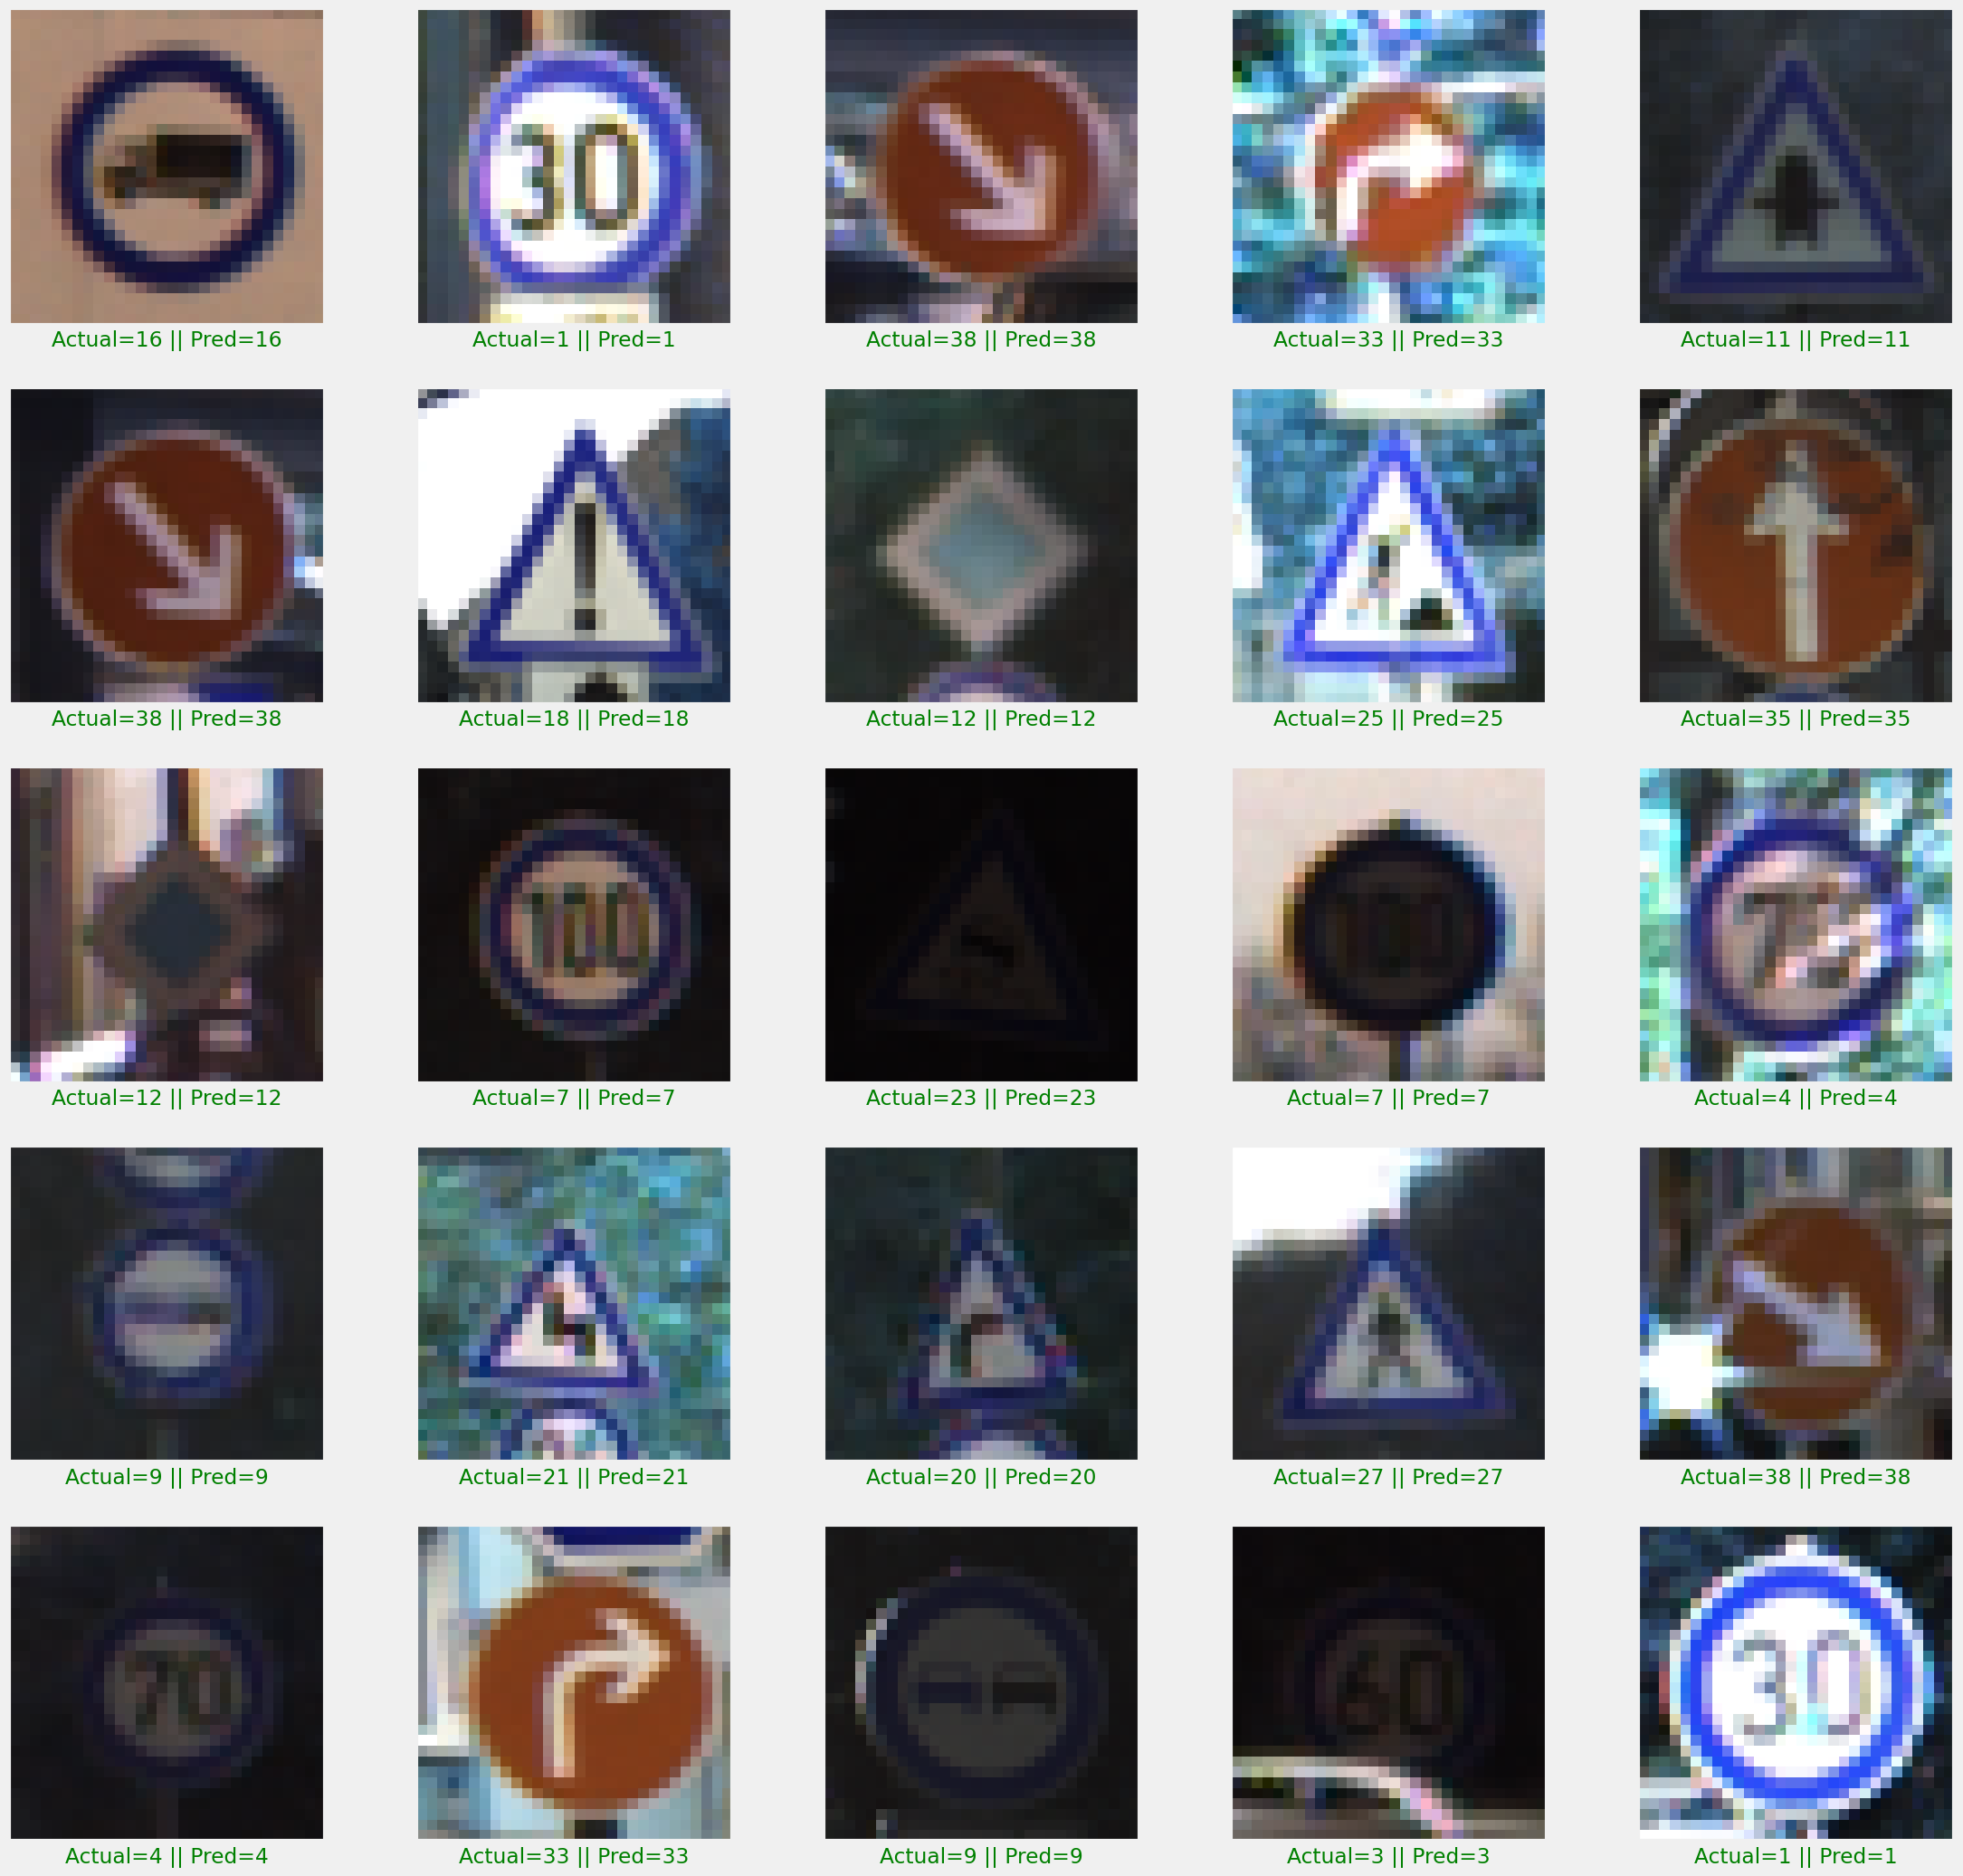

In [ ]:
#Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_CNN_aug[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

### **Conclusiones:**

En comparación con el ejercicio anterior donde usamos Red neuronal general NN con capaz ocultas Las redes convolucionales (CNN, por sus siglas en inglés) son un tipo de arquitectura de redes neuronales especializadas en el procesamiento de datos con estructura de cuadrícula, como imágenes o señales de audio. Aunque no se puede decir que las CNN sean inherentemente "mejores" que las redes neuronales generales (NN), tienen varias características que las hacen altamente efectivas para tareas específicas, como la visión por computadora. En resumen, las redes CNN son altamente efectivas para tareas de visión por computadora debido a su capacidad para extraer características relevantes de manera eficiente, reducir la dimensionalidad y aprender representaciones invariantes a las translaciones. Sin embargo, las redes neuronales generales también tienen aplicaciones en una amplia gama de tareas y pueden ser más adecuadas para problemas que no están estructurados en forma de cuadrícula.

Para este ejercicio se tomó un modelo CNN como base que se encontró en el blog de Kaggle (Yadavyyy, 2023) y se buscó poner a prueba para determinar si ofrecía la precisión requerida y determinar si la aumentación de datos ofrecía un valor agregado a la práctica o no.

Los resultados fueron los siguientes al realizar el entrenamiento y probar con un set de datos de prueba que nunca vieron los modelos durante el entrenamiento:

- CNN sin aumentación de datos --> Test Data accuracy:  96.82501979414093
- CNN con aumentación de datos --> Test Data accuracy:  98.07600950118764

Si bien ambos modelos no mostraron sobre entrenamiento ya que ambos tienen un diferencia de precisión (Accuracy ) entre la validación y el entrenamiento menor al 2%  y su función de pérdida (loss) ambas mostraron valores bajos donde en esta ultima muestra mas estabilidad usando el modelo CNN con aumentación de datos. Ambos modelos cumplen con el objetivo de tener mas de un 90% de precisión.

Para concluir las redes neuronales convolucionales ofrecen mejores resultados en el caso de detección de objetos y clasificación con aplicaciones para visión computacional en comparación con las redes neuronales profundas generales, pero estas demandan mayor poder de computación comparado con las redes neuronales profundas generales considerando la  actividad anterior, otro punto es que al comparar el tiempo por época de el modelo CNN sin aumentación de datos y CNN con aumentación de datos la diferencia fue de 4 a 3 segundo pareciera que no es mucho pero en modelos que requieran más épocas esto podría necesitar mayor tiempo de cómputo.

**Nota:** Este modelo fue ejecutado en ambiente local de anaconda y la instalación de TensorFlow con el uso de la GPU (NVIDIA T1200) para obtener esos tiempos de cómputo. Si se desea correr en Colab podría expirar el tiempo límite máximo que permite Google de uso de GPU.

### Video Resumen

### **Referencias:**

- Stallkamp, J., Schlipsing, M., Salmen, J. e Igel, C. (2011). The German Traffic Sign Recognition Benchmark: A Multiclass Classification Competition. The 2011 International Joint Conference on Neural Networks (IJCNN). 

- Ranjan, S. and Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd.

- Mykola. (2018). GTSRB - German Traffic Sign Recognition Benchmark. Kaggle. https://www.kaggle.com/code/sakshiyadavyyy/gtsrb-cnn1

- Yadavyyy, S. (2023). GTSRB CNN1. Kaggle. https://www.kaggle.com/code/sakshiyadavyyy/gtsrb-cnn1

- Torralba, P. (2022). Qué son las Redes Neuronales Convolucionales. IEBS. https://www.iebschool.com/blog/redes-neuronales-convolucionales-big-data/

- TensorFlow. (s.f.). Install TensorFlow with pip.https://www.tensorflow.org/install/pip#windows-native